In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/mobile-prices-2023/mobile_prices_2023.csv")

## Data Exploring

In [3]:
df

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",2023-06-17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Checking null values

In [5]:
df.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [6]:
df["Date of Scraping"].value_counts()

2023-06-17    1836
Name: Date of Scraping, dtype: int64

In [7]:
df["RAM"].value_counts()

8 GB RAM                      438
4 GB RAM                      383
6 GB RAM                      322
3 GB RAM                      175
2 GB RAM                      108
12 GB RAM                      91
4 MB RAM                       53
128 GB ROM                     43
256 GB ROM                     37
512 GB ROM                     27
64 GB ROM                      23
1 GB RAM                       18
NA ROM                         13
cm Display                      9
0.046875 GB RAM                 8
32 MB RAM                       8
1 TB ROM                        7
8 MB RAM                        7
16 GB RAM                       6
64 MB RAM                       6
0 MB ROM                        5
128 MB RAM                      5
512 MB RAM                      5
16 MB ROM                       4
16 MB RAM                       4
16 GB ROM                       3
50 MB ROM                       2
1 MB ROM                        2
153 MB RAM                      2
48 MB RAM     

In [8]:
df["ROM/Storage"].value_counts()

128 GB ROM               689
64 GB ROM                401
32 GB ROM                210
256 GB ROM               189
4 MB ROM                  41
16 GB ROM                 33
8 GB ROM                  15
32 MB ROM                 13
128 MB ROM                11
0.125 GB ROM               8
Expandable Upto 32 GB      8
4 GB ROM                   7
16 MB ROM                  7
Expandable Upto 16 GB      5
48 MB ROM                  5
512 GB ROM                 4
2.27 MB ROM                2
10 MB ROM                  2
153 MB ROM                 2
100 MB ROM                 2
Expandable Upto 8 GB       2
0 GB ROM                   1
NA KB ROM                  1
2 MB ROM                   1
NA ROM                     1
20 MB ROM                  1
100 KB ROM                 1
Name: ROM/Storage, dtype: int64

In [9]:
df["Battery"].value_counts()

5000 mAh    786
4500 mAh    148
6000 mAh    113
4000 mAh     99
A15 mAh      76
           ... 
1110 mAh      1
1430 mAh      1
4780 mAh      1
5300 mAh      1
3225 mAh      1
Name: Battery, Length: 102, dtype: int64

In [10]:
df["Processor"].value_counts()

1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories    47
Qualcomm Snapdragon 680 Processor                                         45
Brand Warranty for 1 Year                                                 40
12 months                                                                 35
Qualcomm Snapdragon 778G Processor                                        33
                                                                          ..
SDM710 Processor                                                           1
1 Year Manufacturer Warranty for Handset and 6 Months for Accessories      1
Mediatek MT6763T Octa Core 2.5 GHz Processor                               1
MT6737M Quad Core 1.1 GHz Processor                                        1
Helio P22 (MTK6762) Processor                                              1
Name: Processor, Length: 332, dtype: int64

In [11]:
df["Front Camera"].value_counts()

16MP Front Camera               332
8MP Front Camera                307
5MP Front Camera                273
12MP Front Camera               121
32MP Front Camera               102
13MP Front Camera                70
20MP Front Camera                57
7MP Front Camera                 27
32MP + 8MP Dual Front Camera     15
50MP Front Camera                15
20MP + 2MP Dual Front Camera     14
44MP Front Camera                11
2MP Front Camera                  9
10.8MP Front Camera               9
10MP Front Camera                 8
25MP Front Camera                 8
50MP + 8MP Dual Front Camera      8
0.3MP Front Camera                7
16MP + 2MP Dual Front Camera      6
44MP + 2MP Dual Front Camera      5
60MP Front Camera                 5
4MP Front Camera                  4
24MP Front Camera                 3
16MP + 8MP Dual Front Camera      3
8MP + 2MP Dual Front Camera       3
60 MP with OIS                    3
16MP Dual Front Camera            2
32MP + 2MP Dual Front Camera

In [12]:
df["Back/Rare Camera"].value_counts()

50MP Rear Camera                       101
13MP Rear Camera                        93
12MP + 12MP                             81
13MP + 2MP                              81
50MP + 2MP + 2MP                        80
                                      ... 
48MP + 5MP + 16MP                        1
108MP + 8MP + 16MP                       1
108MP + 16MP + 8MP                       1
16MP + 2MP + 2MP                         1
16MP + 5MP + 2MP + Low Light Sensor      1
Name: Back/Rare Camera, Length: 174, dtype: int64

In [13]:
df["Phone Name"].value_counts()

SAMSUNG Guru Music 2                          9
OnePlus 10R 5G (Sierra Black, 256 GB)         5
Nokia 8210 4G                                 4
OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)    4
Nokia 3310 DS 2020                            4
                                             ..
OPPO A785G (Blue, 128 GB)                     1
OPPO A54 (Moonlight Gold, 64 GB)              1
OPPO A54 (Crystal Black, 64 GB)               1
OPPO A16E (White, 32 GB)                      1
Infinix S5 (Quetzal Cyan, 64 GB)              1
Name: Phone Name, Length: 1507, dtype: int64

## Data Cleaning

Removing Processor column because it has lack of information

In [14]:
df = df.drop("Processor", axis=1)

Removing Date of Scraping column 

In [15]:
df = df.drop("Date of Scraping", axis=1)

In [16]:
df.loc[df["RAM"].str.contains("RAM")]

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,"₹6,999"
...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,"₹14,999"
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,"₹14,999"
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,"₹14,999"
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,"₹18,999"


Removing rows without information of RAM in RAM column

In [17]:
df = df.loc[df["RAM"].str.contains("RAM")]

Filling all rows with NaN values in Front Camera to 0

In [18]:
df["Front Camera"] = df["Front Camera"].fillna('0')

In [19]:
df.isnull().sum()

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Price in INR         0
dtype: int64

Removing Diplicated Phone Name Rows

In [20]:
df = df[~df.duplicated(subset=["Phone Name"], keep="first")]

#### Makes Phone Name as index column

In [21]:
df = df.set_index("Phone Name")

#### Making Number of Ratings as numeric column

In [22]:
df["Number of Ratings"] = df["Number of Ratings"].str.replace(",","")

In [23]:
df = df.astype({"Number of Ratings":"float"})

In [24]:
df["Number of Ratings"].describe().round(2)

count       1348.00
mean       47139.86
std       104060.84
min            0.00
25%         1313.00
50%         7885.00
75%        40312.00
max      1342530.00
Name: Number of Ratings, dtype: float64

<Axes: xlabel='Number of Ratings'>

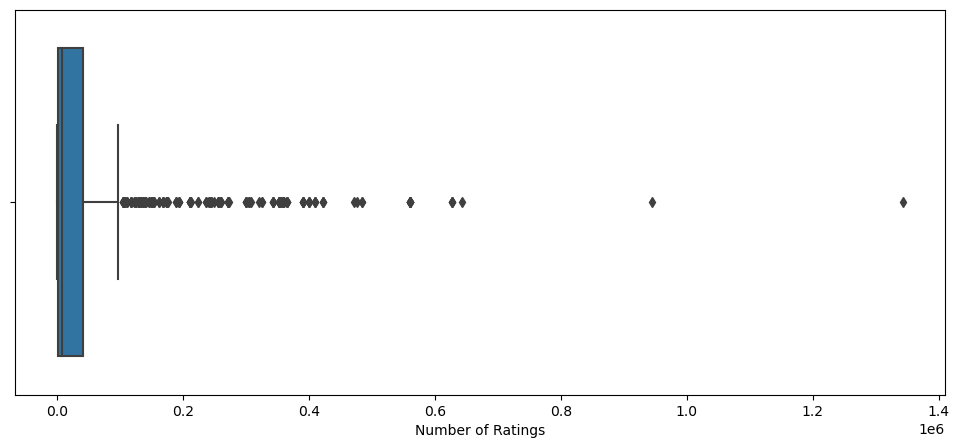

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Number of Ratings")

Removing rows with less than 100 votes and more than 400 000

In [26]:
df = df.drop(df[df["Number of Ratings"] < 100].index, axis=0)
df = df.drop(df[df["Number of Ratings"] > 400000].index, axis=0)

<Axes: xlabel='Number of Ratings'>

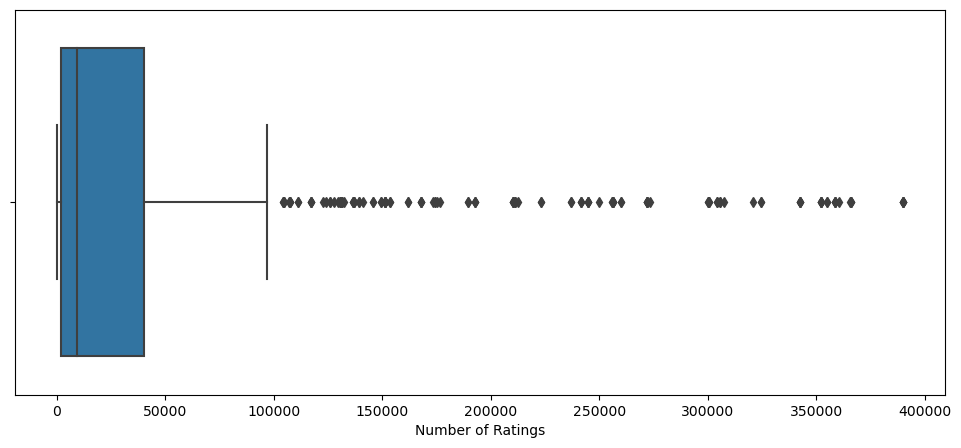

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Number of Ratings")

Removing rows which dont have GB of RAM

In [28]:
df = df.loc[df["RAM"].str.contains("GB")]

#### Making RAM as numeric column

In [29]:
df["RAM"] = df["RAM"].str.replace('\D', '', regex=True)

In [30]:
df = df.rename(columns={"RAM":"GB of RAM"})

In [31]:
df = df.astype({"GB of RAM":"int"})

<Axes: xlabel='GB of RAM'>

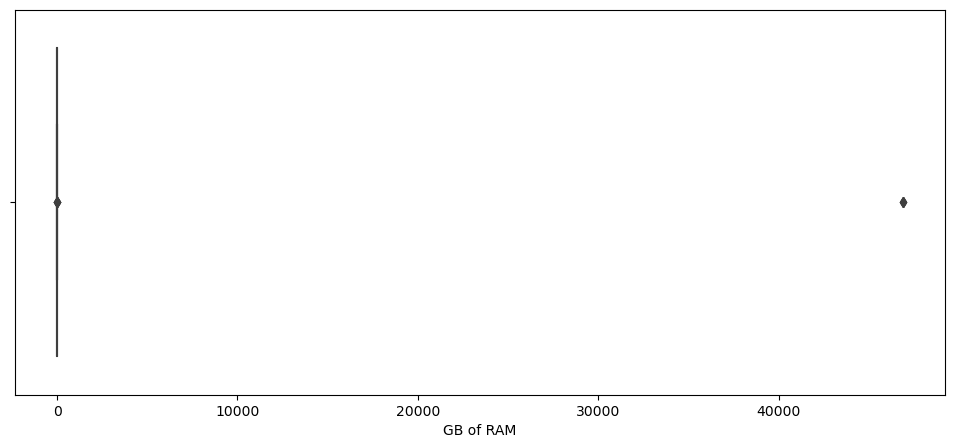

In [32]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="GB of RAM")

Remove Hight value

In [33]:
df = df.drop(df[df["GB of RAM"]>100].index, axis=0)

<Axes: xlabel='GB of RAM'>

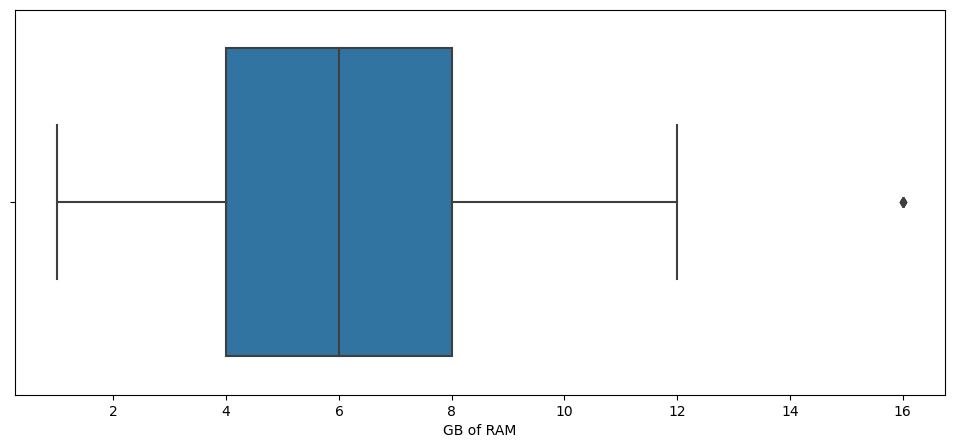

In [34]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="GB of RAM")

Checking if there is any ROM who have other value than GB

In [35]:
df.loc[~df["ROM/Storage"].str.contains("GB")]

,Rating ?/5,Number of Ratings,GB of RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Price in INR
Phone Name,,,,,,,,


#### Making ROM/Storage as numeric column

In [36]:
df["ROM/Storage"] = df["ROM/Storage"].str.replace('\D', '', regex=True)

In [37]:
df = df.rename(columns={"ROM/Storage":"GB in ROM/Storage"})

In [38]:
df = df.astype({"GB in ROM/Storage":"int"})

<Axes: xlabel='GB in ROM/Storage'>

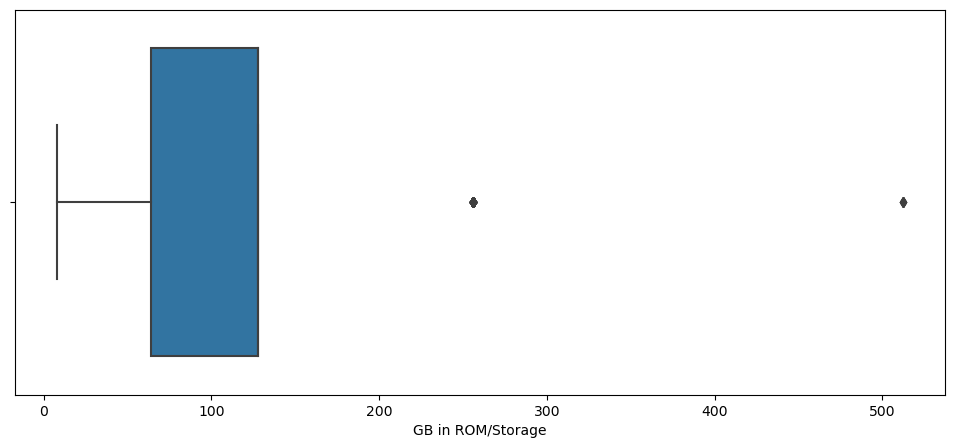

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="GB in ROM/Storage")

Checking if there is any Battery who have other value than mAh

In [40]:
df.loc[~df["Battery"].str.contains("mAh")]

,Rating ?/5,Number of Ratings,GB of RAM,GB in ROM/Storage,Back/Rare Camera,Front Camera,Battery,Price in INR
Phone Name,,,,,,,,


#### Making Battery as numeric column

In [41]:
df["Battery"] = df["Battery"].str.replace('\D', '', regex=True)

In [42]:
df = df.rename(columns={"Battery":"Battery mAh"})

In [43]:
df = df.astype({"Battery mAh":"int"})

<Axes: xlabel='Battery mAh'>

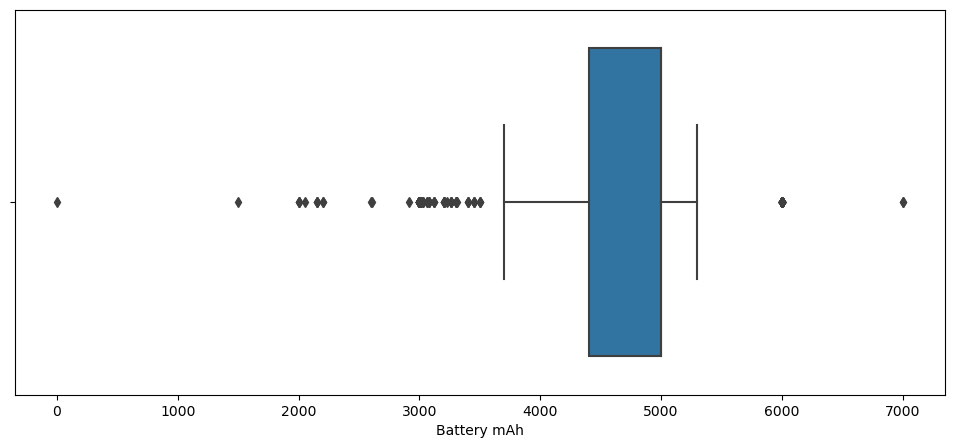

In [44]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Battery mAh")

Remove low Battery value

In [45]:
df = df.drop(df[df["Battery mAh"]<1000].index, axis=0)

<Axes: xlabel='Battery mAh'>

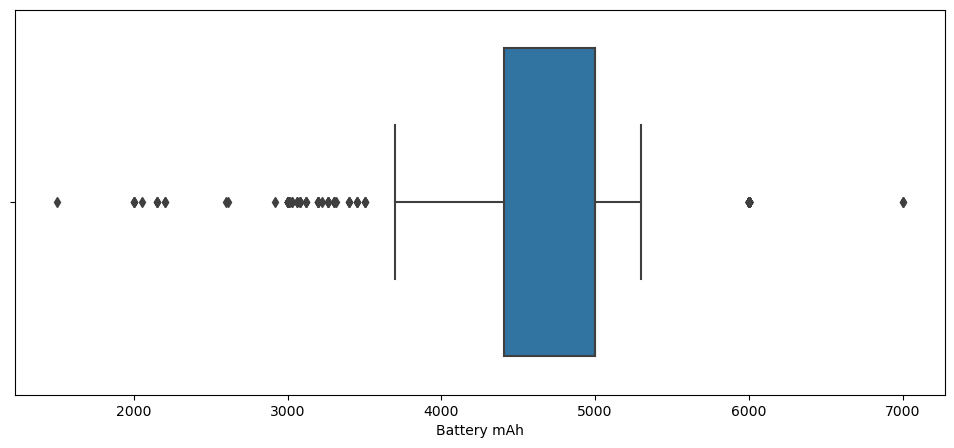

In [46]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Battery mAh")

#### Making Back/Rare Camera and Front Camera as numeric column

Taking 2 first characters from row

In [47]:
df["Front Camera"] = df["Front Camera"].str[:2]
df["Back/Rare Camera"] = df["Back/Rare Camera"].str[:2]

Removing letters

In [48]:
df["Front Camera"] = df["Front Camera"].str.replace('\D', '', regex=True)
df["Back/Rare Camera"] = df["Back/Rare Camera"].str.replace('\D', '', regex=True)

In [49]:
df = df.rename(columns={"Front Camera":"Front Camera MP","Back/Rare Camera":"Back/Rare Camera MP" })

In [50]:
df = df.astype({"Back/Rare Camera MP":"int",  "Front Camera MP":"int",  })

#### Making Price in INR as numeric column

In [51]:
df["Price in INR"] = df["Price in INR"].str.replace('\D', '', regex=True)

In [52]:
df = df.astype({"Price in INR":"int"})

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1186 entries, POCO C50 (Royal Blue, 32 GB) to Infinix S5 (Quetzal Cyan, 64 GB)
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating ?/5           1186 non-null   float64
 1   Number of Ratings    1186 non-null   float64
 2   GB of RAM            1186 non-null   int64  
 3   GB in ROM/Storage    1186 non-null   int64  
 4   Back/Rare Camera MP  1186 non-null   int64  
 5   Front Camera MP      1186 non-null   int64  
 6   Battery mAh          1186 non-null   int64  
 7   Price in INR         1186 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.4+ KB


#### Changing exchange rate from IRN to EURO

in 12.08.2023 1 IRN = 0.011 Euro

In [54]:
df["Price in Euro"] = (df["Price in INR"] * 0.011).round(2)
df = df.drop("Price in INR", axis=1)

### Checking Data

In [55]:
df

,Rating ?/5,Number of Ratings,GB of RAM,GB in ROM/Storage,Back/Rare Camera MP,Front Camera MP,Battery mAh,Price in Euro
Phone Name,,,,,,,,
"POCO C50 (Royal Blue, 32 GB)",4.2,33561.0,2,32,8,5,5000,62.14
"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128.0,4,64,50,8,5000,131.99
"POCO C51 (Royal Blue, 64 GB)",4.3,15175.0,4,64,8,5,5000,76.99
"POCO C55 (Cool Blue, 64 GB)",4.2,22621.0,4,64,50,5,5000,85.24
"POCO C51 (Power Black, 64 GB)",4.3,15175.0,4,64,8,5,5000,76.99
...,...,...,...,...,...,...,...,...
"Infinix Note 7 (Forest Green, 64 GB)",4.3,25582.0,4,64,48,16,5000,164.99
"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,25582.0,4,64,48,16,5000,164.99
"Infinix Note 7 (Aether Black, 64 GB)",4.3,25582.0,4,64,48,16,5000,164.99


In [56]:
df.corr()

,Rating ?/5,Number of Ratings,GB of RAM,GB in ROM/Storage,Back/Rare Camera MP,Front Camera MP,Battery mAh,Price in Euro
Rating ?/5,1.000000,0.231468,0.116812,0.125731,0.100949,0.147200,0.046190,0.163021
Number of Ratings,0.231468,1.000000,-0.286304,-0.272825,-0.129289,-0.055876,-0.002221,-0.236582
GB of RAM,0.116812,-0.286304,1.000000,0.824572,0.506253,0.410224,0.082018,0.678678
GB in ROM/Storage,0.125731,-0.272825,0.824572,1.000000,0.432389,0.339131,0.093912,0.697698
Back/Rare Camera MP,0.100949,-0.129289,0.506253,0.432389,1.000000,0.275778,0.222110,0.247359
Front Camera MP,0.147200,-0.055876,0.410224,0.339131,0.275778,1.000000,-0.119062,0.304417
Battery mAh,0.046190,-0.002221,0.082018,0.093912,0.222110,-0.119062,1.000000,-0.137245
Price in Euro,0.163021,-0.236582,0.678678,0.697698,0.247359,0.304417,-0.137245,1.000000


Drop column Number of Rating because almost every where have nagative correlation

In [57]:
df = df.drop("Number of Ratings", axis=1)

In [58]:
df

,Rating ?/5,GB of RAM,GB in ROM/Storage,Back/Rare Camera MP,Front Camera MP,Battery mAh,Price in Euro
Phone Name,,,,,,,
"POCO C50 (Royal Blue, 32 GB)",4.2,2,32,8,5,5000,62.14
"POCO M4 5G (Cool Blue, 64 GB)",4.2,4,64,50,8,5000,131.99
"POCO C51 (Royal Blue, 64 GB)",4.3,4,64,8,5,5000,76.99
"POCO C55 (Cool Blue, 64 GB)",4.2,4,64,50,5,5000,85.24
"POCO C51 (Power Black, 64 GB)",4.3,4,64,8,5,5000,76.99
...,...,...,...,...,...,...,...
"Infinix Note 7 (Forest Green, 64 GB)",4.3,4,64,48,16,5000,164.99
"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,4,64,48,16,5000,164.99
"Infinix Note 7 (Aether Black, 64 GB)",4.3,4,64,48,16,5000,164.99


## Visualization

<Axes: xlabel='Price in Euro', ylabel='Rating ?/5'>

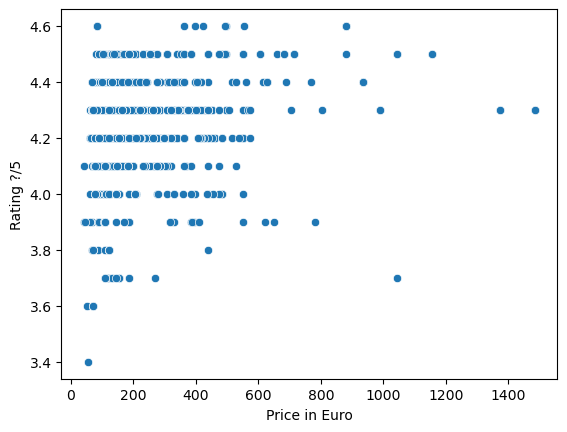

In [59]:
sns.scatterplot(data=df, x="Price in Euro", y="Rating ?/5")

In [60]:
len(df[df["Price in Euro"]>700])

26

Dropping phones over 700 euro, in future model will not be able to predict phone which will be cost more then 700 euro

In [61]:
df = df.drop(df[df["Price in Euro"]>700].index, axis = 0)

<Axes: xlabel='Price in Euro', ylabel='Rating ?/5'>

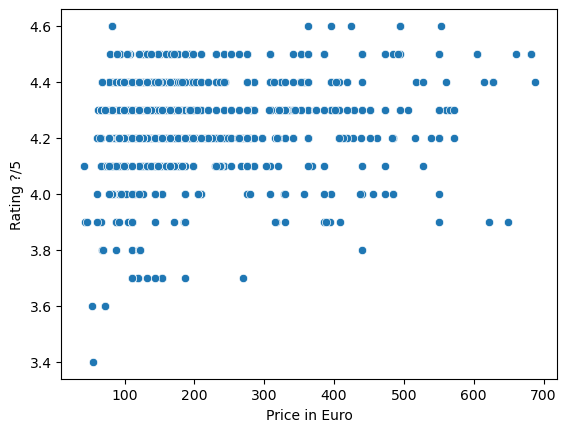

In [62]:
sns.scatterplot(data=df, x="Price in Euro", y="Rating ?/5")

In [63]:
df.describe().round(2)

,Rating ?/5,GB of RAM,GB in ROM/Storage,Back/Rare Camera MP,Front Camera MP,Battery mAh,Price in Euro
count,1160.00,1160.00,1160.00,1160.00,1160.00,1160.00,1160.00
mean,4.27,5.58,104.88,35.36,12.42,4726.85,204.60
std,0.16,2.54,64.44,20.81,11.16,698.49,121.75
min,3.40,1.00,8.00,5.00,0.00,1500.00,41.79
25%,4.20,4.00,64.00,13.00,5.00,4450.00,118.76
50%,4.30,6.00,128.00,48.00,8.00,5000.00,165.81
75%,4.40,8.00,128.00,50.00,16.00,5000.00,263.89
max,4.60,16.00,256.00,64.00,60.00,7000.00,687.50


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


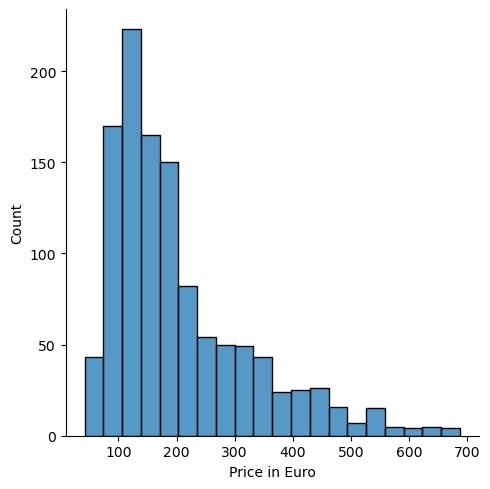

In [64]:
sns.displot(data=df, x="Price in Euro", bins=20)

<Axes: xlabel='Rating ?/5', ylabel='count'>

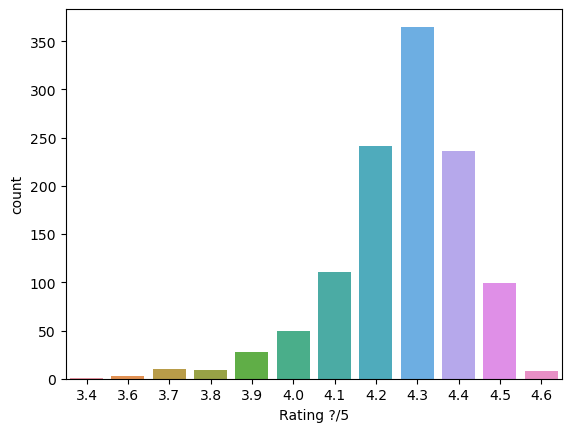

In [65]:
sns.countplot(data=df, x="Rating ?/5")

<Axes: xlabel='GB of RAM', ylabel='count'>

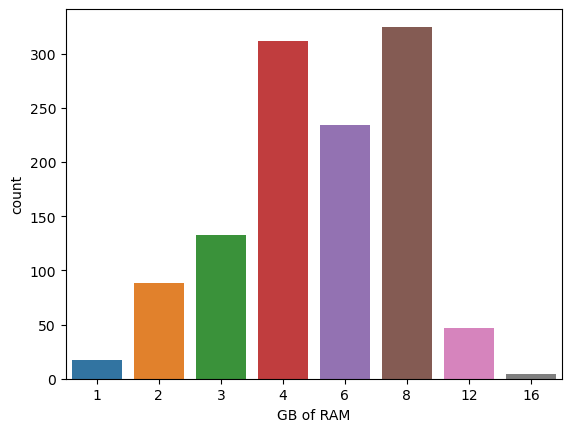

In [66]:
sns.countplot(data=df, x="GB of RAM")

<Axes: xlabel='GB in ROM/Storage', ylabel='count'>

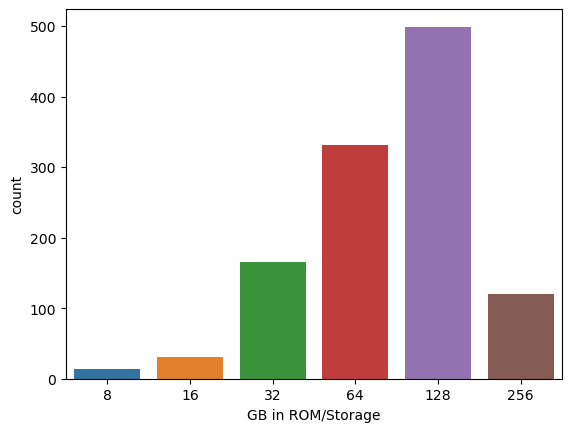

In [67]:
sns.countplot(data=df, x="GB in ROM/Storage")

<Axes: xlabel='Back/Rare Camera MP', ylabel='count'>

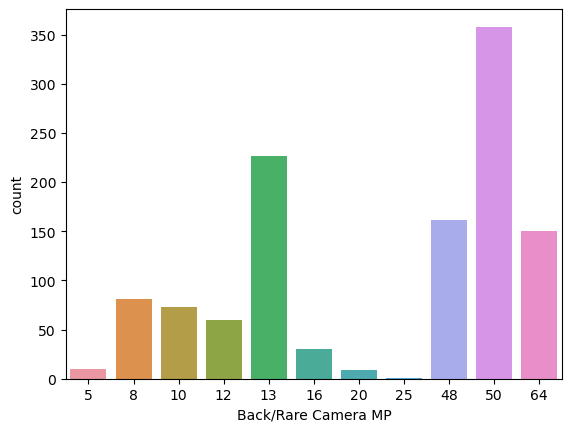

In [68]:
sns.countplot(data=df, x="Back/Rare Camera MP")

<Axes: xlabel='Front Camera MP', ylabel='count'>

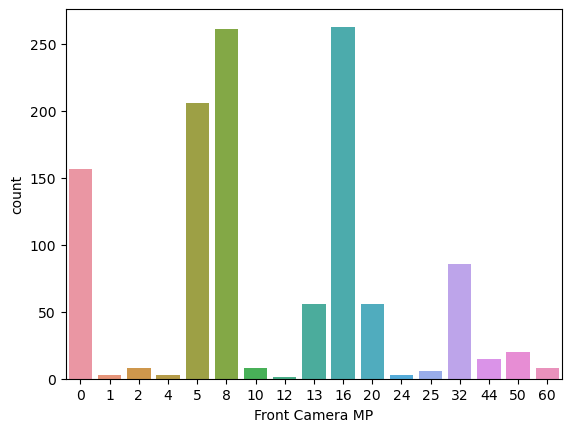

In [69]:
sns.countplot(data=df, x="Front Camera MP")

<Axes: xlabel='Battery mAh'>

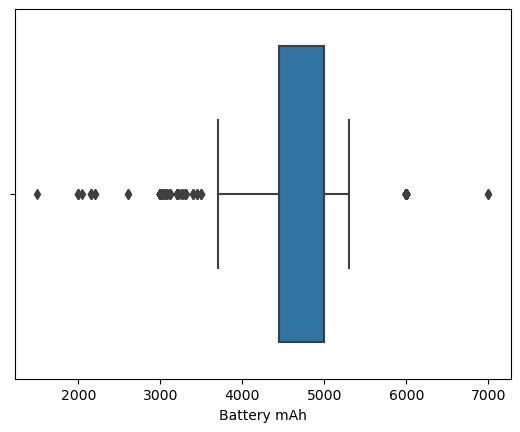

In [70]:
sns.boxplot(data=df, x="Battery mAh")

## Linear Regression

Im gonna predict price of phone base of all available features

### Split and standarize data

In [71]:
X = df.drop("Price in Euro", axis=1)
y = df["Price in Euro"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
# it will be use for almost every method
scaler = StandardScaler()

In [76]:
scaler.fit(X_train)

StandardScaler()

In [77]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Simple Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
# it will be use for almost every method
model = LinearRegression()

In [80]:
model.fit(X_train,  y_train)

LinearRegression()

In [81]:
test_predictions = model.predict(X_test) #y_test

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using loss function to get model accuracy

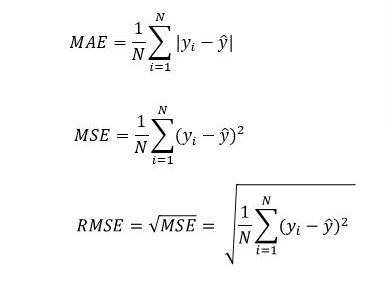

In [83]:
MAE = mean_absolute_error(y_test, test_predictions).round(3)
MSE = mean_squared_error(y_test, test_predictions).round(3)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

MAE: 47.454, MSE: 4816.039, RMSE: 69.398


Price mean =~204.60 Euro so its not very good result

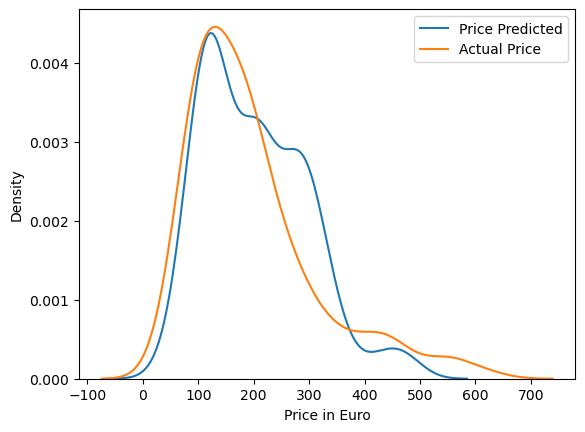

In [84]:
sns.kdeplot(data=test_predictions, label="Price Predicted")
sns.kdeplot(data=y_test, label="Actual Price")
plt.legend();

### Polynomial Regression

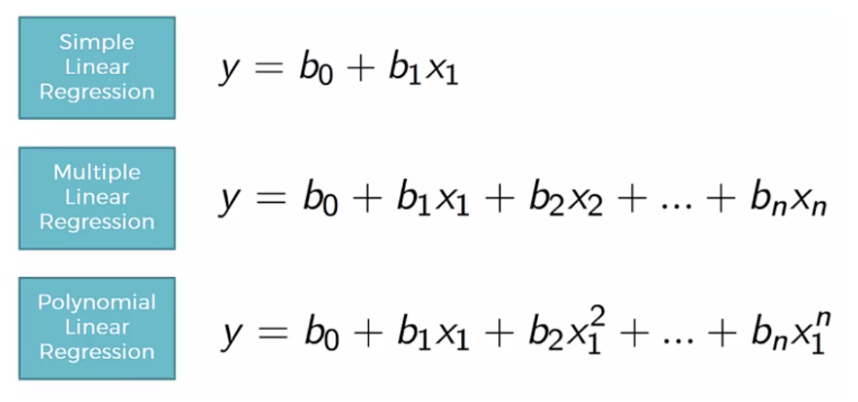
https://www.analyticsvidhya.com/blog/2021/10/understanding-polynomial-regression-model/

In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)

In [87]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [88]:
poly_features = poly_converter.transform(X)

In [89]:
X.shape

(1160, 6)

Polynomial converter made 21 new mixed features

In [90]:
poly_features.shape

(1160, 27)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=8)

In [92]:
scaler.fit(X_train)

StandardScaler()

In [93]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
model.fit(X_train, y_train)

LinearRegression()

In [95]:
test_predictions = model.predict(X_test)

In [96]:
MAE = mean_absolute_error(y_test, test_predictions).round(3)
MSE = mean_squared_error(y_test, test_predictions).round(3)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

MAE: 42.803, MSE: 3918.944, RMSE: 62.601


Now results its little better than in  Simple Linear Regression

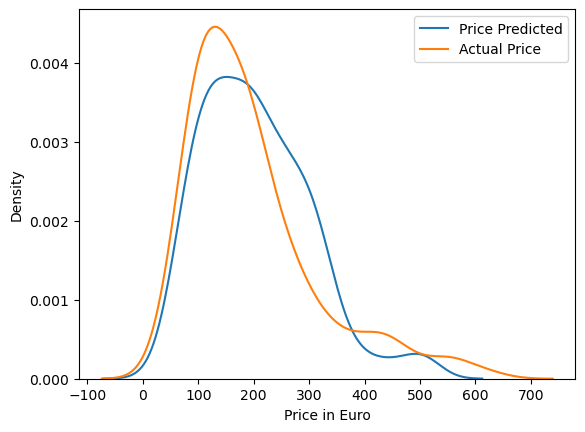

In [97]:
sns.kdeplot(data=test_predictions, label="Price Predicted")
sns.kdeplot(data=y_test, label="Actual Price")
plt.legend();

### Grid Search

In [98]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [99]:
elastic_net = ElasticNet()

In [100]:
param_grid = {"alpha":[0.1, 1, 5, 10, 25, 50, 100], "l1_ratio":[.1, .25, .5, .7, .95, .99, 1]}

In [101]:
grid_model = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                          scoring="neg_mean_squared_error", cv=8, verbose=True)

In [102]:
grid_model.fit(X_train, y_train)

Fitting 8 folds for each of 49 candidates, totalling 392 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.720e+04, tolerance: 1.246e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.143e+03, tolerance: 1.223e+03
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+04, tolerance: 1.292e

GridSearchCV(cv=8, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 25, 50, 100],
                         'l1_ratio': [0.1, 0.25, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=True)

In [103]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [104]:
test_predictions = grid_model.predict(X_test)

In [105]:
MAE = mean_absolute_error(y_test, test_predictions).round(3)
MSE = mean_squared_error(y_test, test_predictions).round(3)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions)).round(3)
print(f"MAE: {MAE}, MSE: {MSE}, RMSE: {RMSE}")

MAE: 42.984, MSE: 4166.716, RMSE: 64.55


GridSearch performed better than Simple Linear Regression but worse than Polynomial Regression

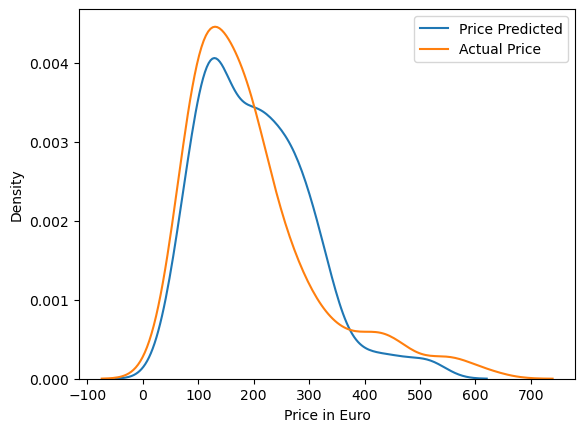

In [106]:
sns.kdeplot(data=test_predictions, label="Price Predicted")
sns.kdeplot(data=y_test, label="Actual Price")
plt.legend();

### Little Conclusion

In my opinion, Model 3 - with grid serch best predicted prices, as can be seen in the chart. However, none of them stood out strongly in determining prices.